In [66]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [67]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [68]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1

    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [75]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [76]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/4
30/30 [==============================] - 4s 85ms/step - loss: 0.5390 - accuracy: 0.7741 - val_loss: 0.4279 - val_accuracy: 0.8550
Epoch 2/4
30/30 [==============================] - 1s 25ms/step - loss: 0.3448 - accuracy: 0.8922 - val_loss: 0.3519 - val_accuracy: 0.8646
Epoch 3/4
30/30 [==============================] - 1s 25ms/step - loss: 0.2621 - accuracy: 0.9152 - val_loss: 0.2942 - val_accuracy: 0.8868
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2110 - accuracy: 0.9325 - val_loss: 0.2767 - val_accuracy: 0.8892


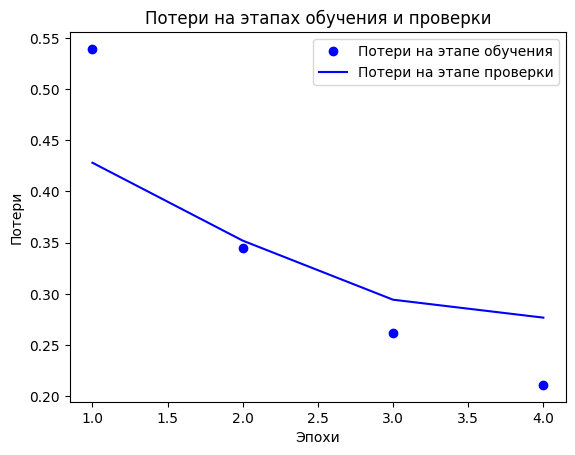

In [77]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "b", label="Потери на этапе проверки")

plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")

plt.legend()

plt.show()

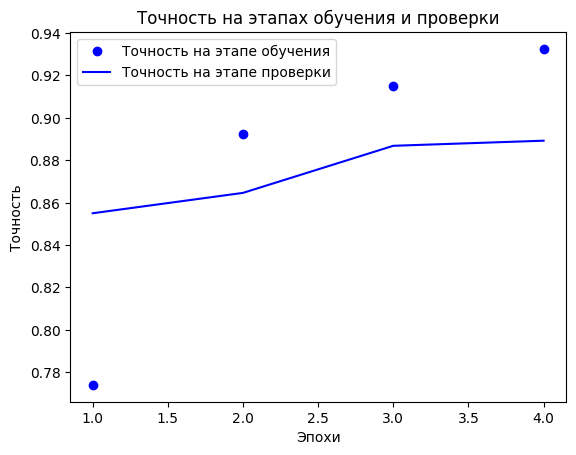

In [78]:
import matplotlib.pyplot as plt

plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_acc, "b", label="Точность на этапе проверки")

plt.title("Точность на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Точность")

plt.legend()

plt.show()